In [1]:
# -*- coding: utf-8 -*-
#  Copyright 2021 - 2022 United Kingdom Research and Innovation
#  Copyright 2021 - 2022 The University of Manchester
#
#  Licensed under the Apache License, Version 2.0 (the "License");
#  you may not use this file except in compliance with the License.
#  You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
#  Unless required by applicable law or agreed to in writing, software
#  distributed under the License is distributed on an "AS IS" BASIS,
#  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#  See the License for the specific language governing permissions and
#  limitations under the License.
#
#   Authored by:    Hannah Robarts (UKRI-STFC)

In [2]:
import numpy
numpy.version.version

'1.26.4'

### Load and visualise data with NikonDataReader
##### This example shows how to use the `NikonDataReader` to load data from Nikon .xtekct files and quickly visualise the data and geometry


Get the example dataset `dataexample.KORN` using `download_data()`.

In [3]:
from cil.utilities import dataexample
dataexample.KORN.download_data(data_dir='.', prompt=False)

Dataset folder already exists in .


Now set up the `NikonDataReader()` to read the .xtekct file. We specify the file to load using `file_name = 'korn/Korn i kasse/47209 testscan korn01_recon.xtekct'`

In [4]:
from cil.io import NikonDataReader
file_name = 'korn/Korn i kasse/47209 testscan korn01_recon.xtekct'
data_reader = NikonDataReader(file_name=file_name)
data = data_reader.read()

Check the data has been loaded correctly by viewing the geometry with `show_geometry()` to display information about the source and detector setup.

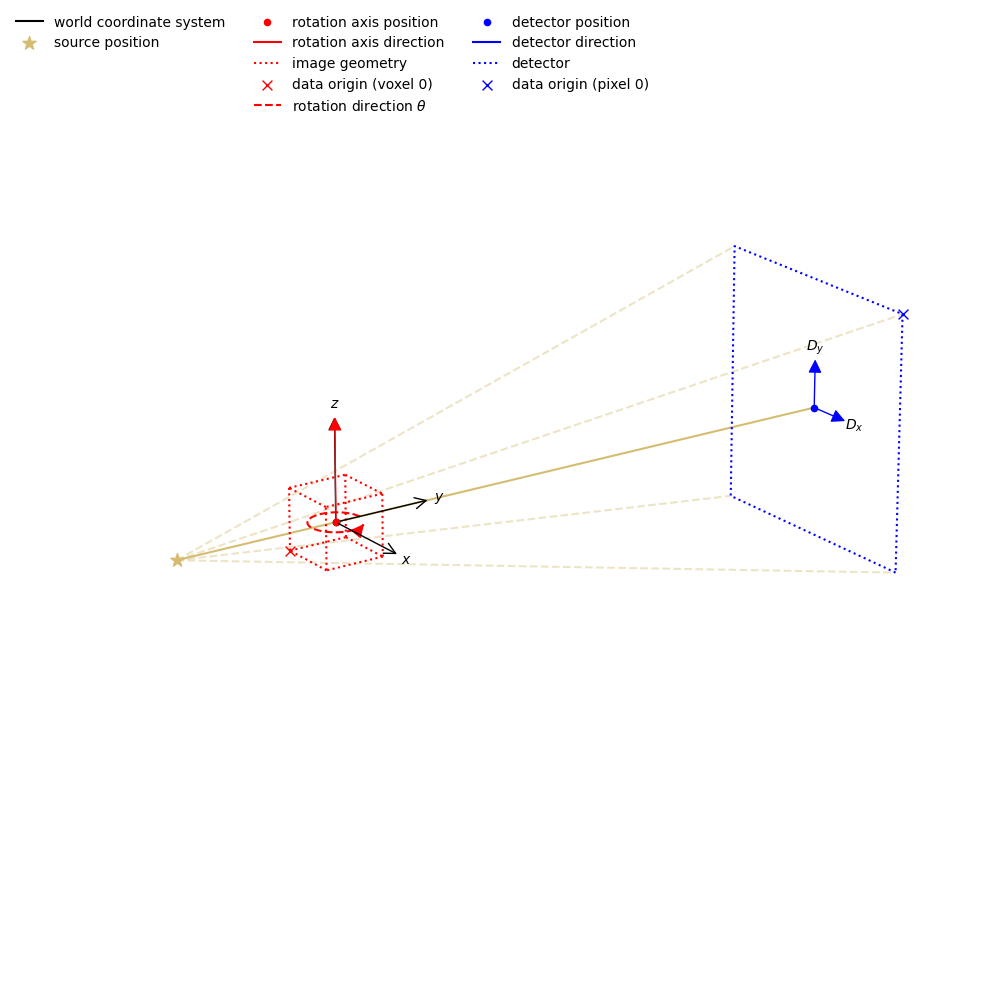

In [6]:
from cil.utilities.display import show_geometry
show_geometry(data.geometry)

And view a central projection of the data with `show2D()`

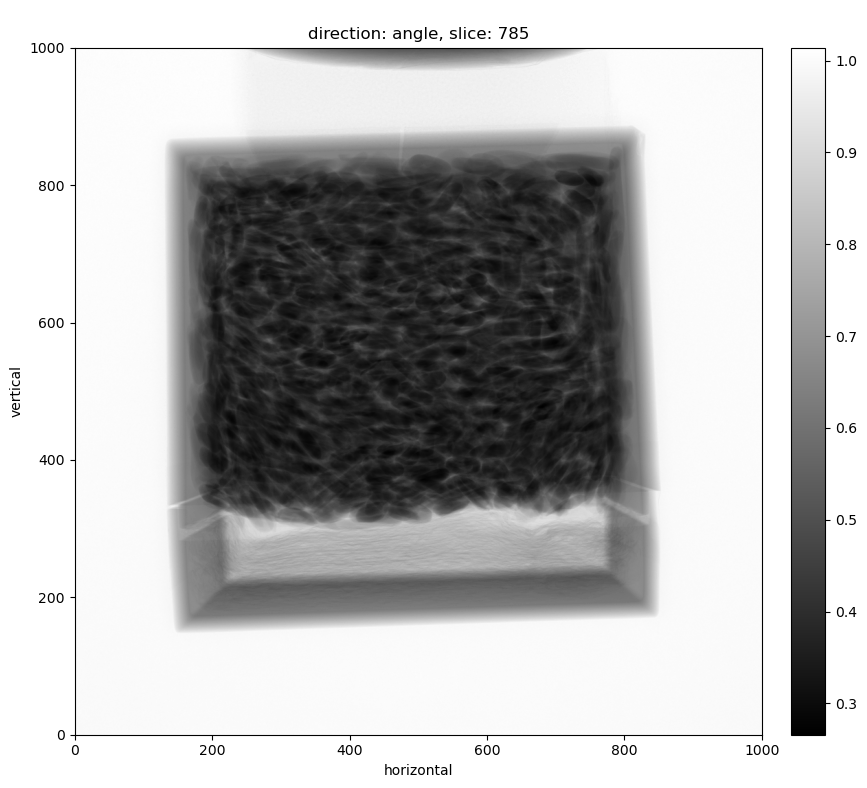

In [7]:
from cil.utilities.display import show2D
show2D(data)

If you want to load the data without normalisation, specify `normalise=False`

In [8]:
file_name = 'korn/Korn i kasse/47209 testscan korn01_recon.xtekct'
data_reader = NikonDataReader(file_name=file_name, normalise=False)
data = data_reader.read()

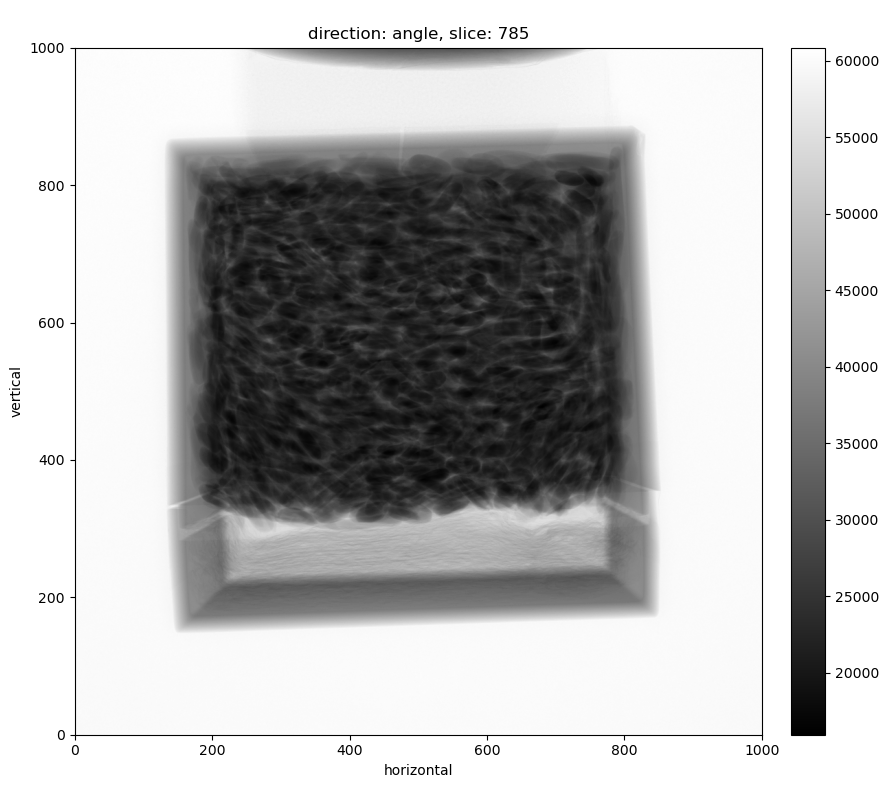

In [9]:
show2D(data)